In [2]:
import os
import math

import h5py
import numpy as np
import matplotlib.pyplot as plt

## Inputs

In [1]:
plot_time = 400

## Load C++ results

In [8]:
results = h5py.File('_duct_results.h5', 'r')

x = np.asarray(results['_duct/x'])
print("x shape", x.shape)

# cell position
cellpos = np.asarray(results['_duct/CellPos'])
print("CellPos shape", cellpos.shape)

# sorting cell positions
sortedidx = np.argsort(cellpos)
cellpos = np.sort(cellpos)
sortedidx = np.flip(sortedidx)
cellpos = np.flip(cellpos)
#print(cellpos)

# lumen segment positions
intpos = np.asarray(results['_duct/IntPos'])
print("IntPos shape", intpos.shape)

# attributes for x array
for key in results['_duct'].attrs.keys():
    print(f"{key}: {results['_duct'].attrs[key]}")
v_c = results['_duct'].attrs['number of cellular variables']
v_l = results['_duct'].attrs['number of lumenal variables']
n_c = results['_duct'].attrs['number of cells']
n_l = results['_duct'].attrs['number of lumen discs']

# time values
dt = results.attrs["output time interval"]
print("output time interval: %f s" % dt)
timevals = np.arange(0.0, x.shape[0]*dt-0.5*dt, dt)
assert timevals.shape[0] == x.shape[0]

# which time step to plot
if plot_time is None:
    plot_ind = -1
    plot_time = timevals[-1]
else:
    plot_ind = np.where(timevals == plot_time)[0][0]

# cells and discs
xplot = x[plot_ind, :]
xc_cxx = np.transpose(xplot[:n_c * v_c].reshape(n_c, v_c))
xl_cxx = np.transpose(xplot[n_c * v_c:].reshape(n_l, v_l))
print("xc.shape", xc_cxx.shape)
print("xl.shape", xl_cxx.shape)

x shape (1001, 570)
CellPos shape (34,)
IntPos shape (44,)
number of cells: 34
number of cellular variables: 9
number of lumen discs: 44
number of lumenal variables: 6
output time interval: 1.000000 s
xc.shape (9, 34)
xl.shape (6, 44)


## Load Matlab results

In [10]:
results_mat = h5py.File('matlab_results.h5', 'r')

x_mat = np.asarray(results_mat['/x'])
print("x_mat shape", x_mat.shape)

# time values
timevals_mat = np.asarray(results_mat['/t'])[:,0]

# which time step to plot
if plot_time is None:
    plot_ind = -1
    plot_time = timevals_mat[-1]
else:
    plot_ind = np.where(timevals_mat == plot_time)[0][0]

# cells and discs
xplot = x_mat[plot_ind, :]
xc_mat = np.transpose(xplot[:n_c * v_c].reshape(n_c, v_c))
xl_mat = np.transpose(xplot[n_c * v_c:].reshape(n_l, v_l))
print("xc.shape", xc_mat.shape)
print("xl.shape", xl_mat.shape)

x_mat shape (2001, 570)
xc.shape (9, 34)
xl.shape (6, 44)


## Plotting

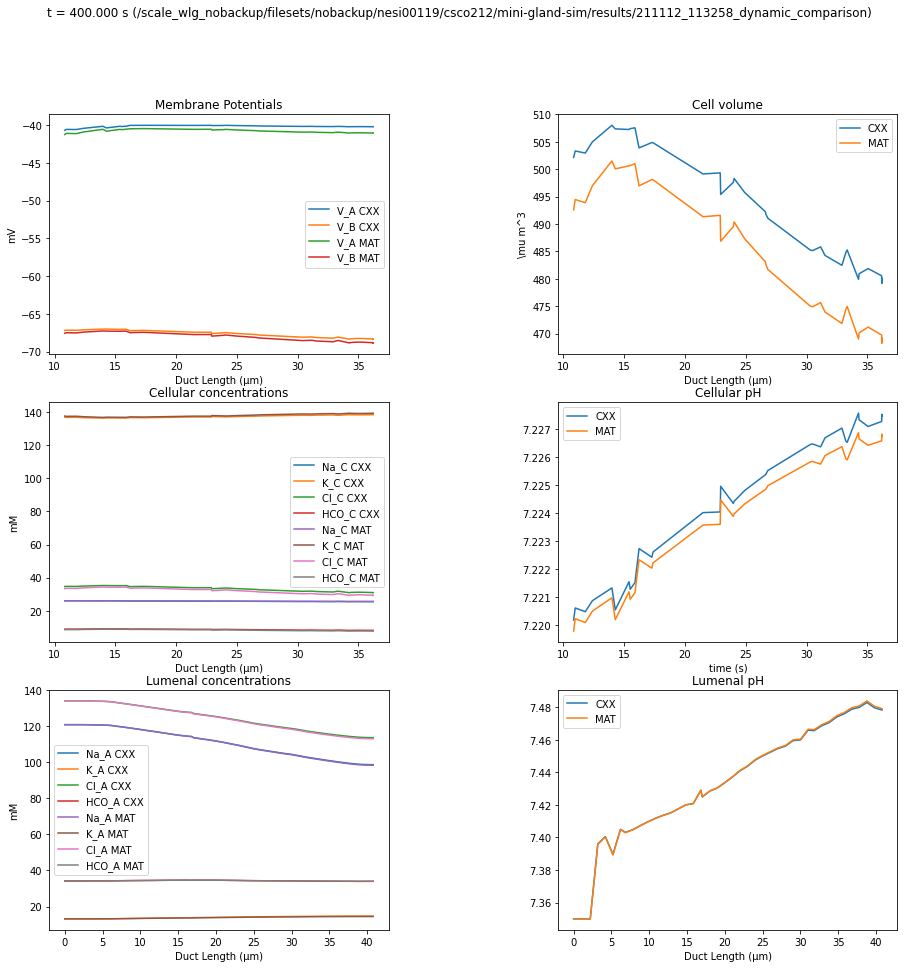

In [12]:
nrow = 3
ncol = 2
fig, plots = plt.subplots(nrow, ncol, squeeze=False)
plt.subplots_adjust(wspace=0.5)
fig.set_size_inches(ncol * 7.6, nrow * 5.0)
fig.suptitle("t = %.3f s (%s)" % (plot_time, os.getcwd()))

plots[0, 0].plot(cellpos, xc_cxx[0, sortedidx], label="V_A CXX")
plots[0, 0].plot(cellpos, xc_cxx[1, sortedidx], label="V_B CXX")
plots[0, 0].plot(cellpos, xc_mat[0, sortedidx], label="V_A MAT")
plots[0, 0].plot(cellpos, xc_mat[1, sortedidx], label="V_B MAT")
plots[0, 0].legend(loc='best')
plots[0, 0].set_title("Membrane Potentials")
plots[0, 0].set_xlabel(u"Duct Length (\u03bcm)")
plots[0, 0].set_ylabel("mV")
plots[0, 0].ticklabel_format(useOffset=False)

plots[0, 1].plot(cellpos, xc_cxx[2, sortedidx], label="CXX")
plots[0, 1].plot(cellpos, xc_mat[2, sortedidx], label="MAT")
plots[0, 1].legend(loc='best')
plots[0, 1].set_title("Cell volume")
plots[0, 1].set_xlabel(u"Duct Length (\u03bcm)")
plots[0, 1].set_ylabel("\\mu m^3")
plots[0, 1].ticklabel_format(useOffset=False)

plots[1, 0].plot(cellpos, xc_cxx[3, sortedidx], label="Na_C CXX")
plots[1, 0].plot(cellpos, xc_cxx[4, sortedidx], label="K_C CXX")
plots[1, 0].plot(cellpos, xc_cxx[5, sortedidx], label="Cl_C CXX")
plots[1, 0].plot(cellpos, xc_cxx[6, sortedidx], label="HCO_C CXX")
plots[1, 0].plot(cellpos, xc_mat[3, sortedidx], label="Na_C MAT")
plots[1, 0].plot(cellpos, xc_mat[4, sortedidx], label="K_C MAT")
plots[1, 0].plot(cellpos, xc_mat[5, sortedidx], label="Cl_C MAT")
plots[1, 0].plot(cellpos, xc_mat[6, sortedidx], label="HCO_C MAT")
plots[1, 0].legend(loc='best')
plots[1, 0].set_title("Cellular concentrations")
plots[1, 0].set_xlabel(u"Duct Length (\u03bcm)")
plots[1, 0].set_ylabel("mM")
plots[1, 0].ticklabel_format(useOffset=False)

plots[1, 1].plot(cellpos, -np.log10(xc_cxx[7, sortedidx] * 1e-3), label="CXX")
plots[1, 1].plot(cellpos, -np.log10(xc_mat[7, sortedidx] * 1e-3), label="MAT")
plots[1, 1].legend(loc='best')
plots[1, 1].set_title("Cellular pH")
plots[1, 1].set_xlabel("time (s)")
plots[1, 1].ticklabel_format(useOffset=False)

plots[2, 0].plot(intpos, xl_cxx[0, :], label="Na_A CXX")
plots[2, 0].plot(intpos, xl_cxx[1, :], label="K_A CXX")
plots[2, 0].plot(intpos, xl_cxx[2, :], label="Cl_A CXX")
plots[2, 0].plot(intpos, xl_cxx[3, :], label="HCO_A CXX")
plots[2, 0].plot(intpos, xl_mat[0, :], label="Na_A MAT")
plots[2, 0].plot(intpos, xl_mat[1, :], label="K_A MAT")
plots[2, 0].plot(intpos, xl_mat[2, :], label="Cl_A MAT")
plots[2, 0].plot(intpos, xl_mat[3, :], label="HCO_A MAT")
plots[2, 0].legend(loc='best')
plots[2, 0].set_title("Lumenal concentrations")
plots[2, 0].set_xlabel(u"Duct Length (\u03bcm)")
plots[2, 0].set_ylabel("mM")
plots[2, 0].ticklabel_format(useOffset=False)

plots[2, 1].plot(intpos, -np.log10(xl_cxx[4, :] * 1e-3), label="CXX")
plots[2, 1].plot(intpos, -np.log10(xl_mat[4, :] * 1e-3), label="MAT")
plots[2, 1].legend(loc='best')
plots[2, 1].set_title("Lumenal pH")
plots[2, 1].set_xlabel(u"Duct Length (\u03bcm)")
plots[2, 1].ticklabel_format(useOffset=False)

In [21]:
fig.savefig('plot_time_compare.pdf')